# Лабораторная работа 3
## Методы группировки данных в Pandas

### 1. Группировка и агрегирование
Разбиение набора данных на группы и применение некоторой функции к каждой группе является одной из важнейших операций анализа данных. 

После загрузки, слияния и подготовки набора данных обычно вычисляют статистику по группам или, возможно, сводные таблицы для построения отчета или визуализации.
Хэдли Уикхэм  предложил для групповых операций термин разделение-применение-объединение, который очень удачно описывает процесс. 

На первом этапе данные, хранящиеся в объекте Pandas разделяются на группы по одному или нескольким признакам (ключам). Разделение производится вдоль одной оси объекта (по строкам (axis=0) или по столбцам (axis=1)). Затем к каждой группе применяется некоторая функция, в следствие чего получается некоторое новое значение. 

Результаты применения всех функций объединяются в результирующий объект, форма которого обычно зависит от операций, выполненных с данными.

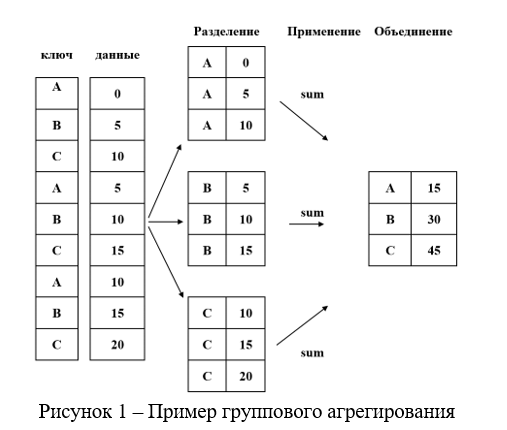

Ключи группировки могут задаваться по-разному и необязательно должны быть одного типа:
- список или массив значений той же длины, что ось, по которой выполняется группировка;
- значение, определяющее имя столбца объекта DataFrame;
- словарь или объект Series, определяющий соответствие между значениями на оси группировки и именами групп;
- функция, которой передается индекс оси или отдельные метки из этого индекса.


In [1]:
#импортируем библиотеку Pandas
import pandas as pd

#### Метод GroupBy
Создадим DataFrame об успеваемости студентов:

In [ ]:
#создаем объект
people = pd.DataFrame(
    [["Иванов", "Математика", 91, "ПКТб-18"],
     ["Микитка", "Математика", 95, "МКМб-18"],
     ["Ковтун", "Статистика", 77, "ПКТб-18"],
     ["Девятков", "Статистика", 68, "МКМб-18"],
     ["Барбаков", "Физика", 93, "ПКТб-18"],
     ["Ибраев", "Математика", 68, "МКМб-18"],
     ["Ковтун", "Физика", 76, "ПКТб-18"]],
     columns = ["Фамилия", "Дисциплина", "Балл", "Группа"])

#просматриваем объект
people

Пусть требуется вычислить среднее по столбцу Балл, используя метки групп в столбце Дисциплина. Сделать это можно несколькими способами. Первый – взять столбец Балл и вызвать метод groupby, передав ему столбец (объект Series) Дисциплина: 

In [ ]:
grps = people['Балл'].groupby(people['Дисциплина'])
grps

Переменная grps – это объект GroupBy. 

Пока он не вычислил ничего, кроме промежуточных данных о групповом ключе. 

Этот объект хранит всю информацию, необходимую для последующего применения некоторой операции к каждой группе. 

Чтобы вычислить средние по группам, используется метод mean объекта GroupBy:

In [ ]:
grps.mean()

Если методу groupby передать несколько столбцов в виде списка, то результат будет другой. 

Например, вычислим средний балл по каждой дисциплине по каждой группе отдельно:

In [ ]:
grps1 = people['Балл'].groupby([people['Дисциплина'], people['Группа']])
grps1.mean()

или, также минимальный балл:

In [ ]:
grps1.min()

Как правило, информация о группировке находится в том же объекте DataFrame, что и группируемые данные. 

Поэтому, в качестве групповых ключей можно передать имена столбцов. При этом неважно, какие данные они содержат: строки, числа или другие объекты Python). 

Например, 

In [ ]:
people.groupby('Дисциплина').mean()

или

In [ ]:
people.groupby('Группа').mean()

В обоих случаях результат содержит только столбец Балл.

По умолчанию, агрегируются все числовые столбцы. 

Столбцы, содержащие нечисловые данные считают посторонними и в результат не включают. 

Столбцы можно выбрать и самостоятельно:

In [ ]:
people.groupby("Дисциплина")["Балл"].median()

In [ ]:
people.groupby("Дисциплина")["Группа"].count()

Вне зависимости от цели использования groupby у объекта GroupBy есть полезный метод size, который возвращает объект Series, содержащий размеры групп:

In [ ]:
people.groupby(['Группа']).size()

In [ ]:
people.groupby(['Группа', 'Дисциплина']).size()

Самым общим из методов GroupBy является apply, который разделяет обрабатываемый объект на части, вызывает для каждой части переданную функцию, а затем конкатенирует все части вместе.

In [ ]:
grps2 = people.groupby('Дисциплина')
grps2.apply(lambda df: display(df))

Агрегирование представляет собой любое преобразование данных, которое порождает скалярные значения из массивов. 

К таким преобразованиям относятся уже использованные выше mean, count, min.

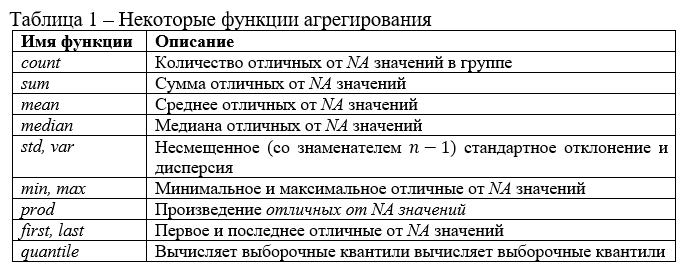

Можно придумать собственные способы агрегирования. 

Для использования собственных функций агрегирования нужно функцию, агрегирующую массив, передать методу agg. Например:

In [ ]:
def razmah(arr):
    return arr.max()-arr.min()
grps2.agg(razmah)

In [ ]:
grps2.agg(['mean', 'max', razmah])

### 2. Сводные таблицы и перекрестное табулирование
Сводная таблица – это средство обобщения данных, применяемое в электронных таблицах и других аналитических программах. 

Оно агрегирует таблицу по одному или нескольким ключам и строит другую таблицу, в которой одни групповые ключи расположены в строках, а другие – в столбцах. 

Библиотека Pandas позволяет строить сводные таблицы с помощью рассмотренного выше метода groupby(). 

В классе DataFrame имеется метод pivot_table(). 

Помимо удобного интерфейса к groupby() функция pivot_table() еще умеет добавлять частичные итоги, которые называются маргиналами.

In [ ]:
people.pivot_table(
    values = "Фамилия", 
    index = "Дисциплина", 
    columns = "Группа", 
    aggfunc = "count"  
)

Можно указать, как заполнять пропущенные значения:

In [ ]:
people.pivot_table(
    values = "Фамилия",
    index = "Дисциплина",
    columns = "Группа",
    aggfunc = "count",
    fill_value = 0.0
)

Таблица сопряженности, или перекрестная таблица (cross-tabulation, или для краткости crosstab(), – частный случай сводной таблицы, в которой представлены групповые частоты. 

Таблицу сопряженности можно построить, используя метод crosstab(). 

Построим таблицу сопряженности для признаков пол и семейное положение в абсолютных значениях и в долях:

In [20]:
#импортируем библиотеки и считаем данные
import numpy as np
import pandas as pd
# при необходимости измените путь к данным
df = pd.read_csv('scoring_eng.csv')

In [ ]:
#строим таблицу сопряженности 
#для признаков пол и семейное положение в абсолютных значениях
pd.crosstab(df['ПОЛ'], df['ОБРАЗОВАНИЕ'])

In [ ]:
#и в долях
pd.crosstab(df['ПОЛ'], df['ОБРАЗОВАНИЕ'], normalize=True)

#### Метод Merge
Метод merge объединяет данные из двух DataFrame в один.

Пусть имеется список адресов электронной почты, который нужно объединить с фреймом people:

In [ ]:
email=pd.DataFrame(
     [["Барбаков", "barbakov@tyuiu.ru"],
      ["Девятков", "devjatkov@tyuiu.ru"],
      ["Иванов","ivanov@mail.ru"],
      ["Иванов","ivanov@tyuiu.ru"],
      ["Ковтун","kovtun@urfu.ru"],
      ["Латышева","latysheva@tsogu.ru"],
      ["Микитка","mikitka@mail.ru"],
      colums = ["Фамилия студента","Email"]
     ])

Для объединения таблиц people и email используем функцию merge:

In [ ]:
people.merge(email,
             how = "inner",
             left_on = "Фамилия", right_on = "Фамилия студента")

Параметр how = "inner" означает, что новый фрейм данных генерируется из пересечения левого и правого фреймов, т.е. новый фрейм данных содержит информацию только о тех студентах, фамилии которых есть в обеих таблицах. 

Например, у Ибраева нет электронной почты, а в таблице people отсутствует информация об успеваемости Латышевой. 

Фамилия Иванов дважды встречается в таблице email и дважды отображается в новом фрейме. 

Фамилия Ковтун встречается два-жды в таблице people и также появляется дважды в объединенном фрейме. 

Для устранения дубликатов можно сгруппировать данные по фамилии и включить в объединенную таблицу первую (или последнюю) из одинаковых записей:

In [ ]:
(
    people
        .merge(email,
               how = "inner",
               left_on = "Фамилия", right_on = "Фамилия студента")	
        .groupby('Фамилия').first()

)

Если в объединенный фрейм нужно включить все данные исходных таблиц, то параметру how следует передать значения "left", "right" или "outer" соответственно. 

При этом отсутствующие данные будут заполнены значением NaN

people.merge(email,
             how = "left",
             left_on = "Фамилия", right_on = "Фамилия студента")

In [ ]:
people.merge(email,
             how = "right",
             left_on = "Фамилия", right_on = "Фамилия студента")

In [ ]:
people.merge(email,
             how = "outer",
             left_on = "Фамилия", right_on = "Фамилия студента")